# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import ipywidgets as widgets
from fuzzywuzzy import fuzz
%matplotlib inline
from ipywidgets import interactive

# 1. File Loading

## 1.1 Load csv 

In [3]:
tasteData = pd.read_csv('Varietal_taste.csv',encoding='latin-1')
tasteData.head()

Varietal                               Taste
0     Falanghina                 high_tannin, fruity
1     Negroamaro            high_tannin, low_acidity
2  Montepulciano                          chocolatey
3         Grillo            dry, high_tannin, fruity
4       Vermouth  dry, high_tannin, light_body, herb

## 1.2 Load Web Scraped and Web API’s Data

Web scraped data (including varietal, price, region, rating and other features) of all the wine products selling on Wine.com is used to create a wine catalog.

Web scraped data from Total Wine and Web API’s data from Amazon are used to compare the prices of same wine products in the wine catalog.

In [4]:
data=pd.read_csv("WineDotCom.csv",encoding='latin-1').iloc[:,1:]
data.head()
data2=pd.read_csv("TotalWine.csv").iloc[:,1:]
data3=pd.read_csv("AmazonAPI.csv")

## 2.3 Load Text File  

The introductions of different varietals are stored in the text files located in a subfolder called "Varietal". In this section, the program load all the text files and into a list so that the program can rapidly display the introduction of selected varietal.

In [5]:
#View description of varietal
all_files = os.listdir("Varietal/") #suppose you are one directory above test dir
print(all_files)
txt_files = filter(lambda x: x[-4:] == '.txt', all_files) #filter out all the text files 
print(txt_files)
varietal_files = list(txt_files)

['Pinot Blanc.txt', 'Gewurztraminer.txt', 'Carmenere.txt', 'Petit Verdot.txt', 'Tempranillo.txt', 'Pinot Gris:Grigio.txt', 'Junmai-Ginjo.txt', 'Cabernet Franc.txt', 'Chardonnay.txt', '.DS_Store', 'Verdejo.txt', 'Vermentino.txt', 'Vermouth.txt', 'Barbera.txt', 'Red Sparkling Wine.txt', 'Grenache Blanc.txt', 'Gruner Veltliner.txt', 'Torrontes.txt', 'Viognier.txt', 'Sherry.txt', 'Picpoul.txt', 'Gamay.txt', 'Port.txt', 'Albarino.txt', 'Furmint.txt', 'Tannat.txt', 'Zinfandel.txt', 'Bonarda.txt', 'Chenin Blanc.txt', 'Malvasia.txt', 'Malbec.txt', 'Aligote.txt', 'Garganega.txt', 'Merlot.txt', 'Muller Thurgau.txt', 'Muscat.txt', 'Syrah:Shiraz.txt', 'Mourvedre.txt', 'Touriga Nacional.txt', 'Dolcetto.txt', 'Nero d&apos;Avola.txt', 'Assyrtiko.txt', 'Sauvignon Blanc.txt', 'Rhone Red Blends.txt', 'Primitivo.txt', 'Roussanne.txt', 'Cinsault.txt', 'Greco.txt', 'Aglianico.txt', 'White Zinfandel.txt', 'Cortese.txt', 'Godello.txt', 'RosÌ©.txt', 'Grechetto.txt', 'Bordeaux Red Blends.txt', 'Lagrein.txt', 

In [6]:
os.chdir("Varietal/")
varietal_intro = {}
for f in varietal_files :
    with open(f, 'r') as file:
        varietal_intro[f] = file.read()

In [7]:
#Test if the text files are successfully loaded
print(varietal_intro['Aligote.txt'])

Aligote
Perfect ripeness balanced with a characteristic acidity make Aligoté a unique white grape in Burgundy. But since Chardonnay reigns supreme across the appellation, Aligoté almost always ends up unfairly lost in its shadowthough not always! In Côte Chalonnaise, in a quaint village named Bouzeron, just south of the Côte de Beaune, Aligoté has its very own appellation where yields are limited in order to enhance the grapes flavors and aromas. Some of the worlds very best come from there. And curiously, the famous producer, Domaine Ponsot, bottles a 100% Aligoté from its Premier Cru in Morey-Ste-Denis, Les Monts Luisants, made from Aligoté vines planted in 1911. Vignerons in the New World experiment with the grape but it is really most popular outside of Burgundy in the Eastern European countries of Romania, Burlgaria, Ukraine, and Moldova. What makes Aligoté unique is its intense citrus fruit flavors balanced by a floral character of honeysuckle blossom and a supple texture.


In [8]:
os.chdir("..") #move up one directory

# 2. Data Pre-processing

## 2.1 Data Cleaning and Preparation

Transform the title, price, rating and number of raters from Web scraped and Web API's data into correct format.

In [9]:
def clean_title(value):
    value = str(value).split(',')[0]
    return value
data3['Title'] = data3['Title'].apply(clean_title)

def clean_price(value):
    value = str(value).replace(',', '').replace('$', '').strip()
    return float(value)
data2['Price'] = data2['Price'].apply(clean_price)
data3['Price'] = data3['Price'].apply(clean_price)

def clean_rating(value):
    value = str(value).replace('%', '').replace('width:', '').strip()
    return float(value)/100*5
data2['StarRating'] = data2['StarRating'].apply(clean_rating)

def clean_rater(value):
    if pd.isnull(value):
        return 0
    value = str(value).split('\t')[0][1:]
    return int(value)
data2['numRater'] = data2['numRater'].apply(clean_rater)

After data cleaning:

In [10]:
data2.head()

Title  Price  StarRating  numRater  \
0            Cloud Break Chardonnay   8.99         4.3       110   
1  Kendall Jackson Chardonnay, 2016   9.97         4.2        56   
2            Buttercream Chardonnay  13.99         3.6        69   
3            Veuve Clicquot Brut NV  45.97         4.7        36   
4                La Vostra Prosecco  10.99         4.2        29   

                                       Shopping_Link  \
0  https://www.totalwine.com/wine/white-wine/char...   
1  https://www.totalwine.com/wine/white-wine/char...   
2  https://www.totalwine.com/wine/new-arrivals/wh...   
3  https://www.totalwine.com/wine/champagne-spark...   
4  https://www.totalwine.com/wine/champagne-spark...   

                                             Img_src  
0  https://image1.totalwine.com/media/sys_master/...  
1  https://image1.totalwine.com/media/sys_master/...  
2  https://image1.totalwine.com/media/sys_master/...  
3  https://image1.totalwine.com/media/sys_master/...  
4  https://image1.totalwine.com/media/sys_master/...

In [11]:
data3.head()

Unnamed: 0                                              Title  Price  \
0           0  Ariel Cabernet Sauvignon Non-Alcoholic Red Win...  19.98   
1           1                      Dark Horse Cabernet Sauvignon   7.99   
2           2                              Dark Horse Chardonnay   8.99   
3           3   St Regis Cabernet Sauvignon (non alcoholic wine)  23.97   
4           4                         Meiomi Pinot Noir Red Wine  23.99   

                          Shopping_Link  
0  https://www.amazon.com/dp/B005MRMOAU  
1  https://www.amazon.com/dp/B00AH5AOUE  
2  https://www.amazon.com/dp/B01EVBDL5E  
3  https://www.amazon.com/dp/B071NQ6BVC  
4  https://www.amazon.com/dp/B00QVKYCQ6

## 2.2 Data Mapping

Same wine product may have slightly different names in different online stores, use fuzzywuzzy package to calculate the similarity of two strings, then match product titles in other online stores (Total Wine and Amazon) with the titles in wine catalog (Wine.com)
* Note: The following two cells may take a few hours to execute. The output dataframe can be read directly from 'data_compare.csv'

In [ ]:
data_match1=pd.DataFrame(columns=['Title', 'Title2'])
titles=list(data2['Title'].unique())
for index in data.index:
    if pd.isnull(data.loc[index]['Year']):
        year=''
    else: year=str(int(data.loc[index]['Year']))
    for title in titles:
        if year in title:
            if fuzz.token_sort_ratio(data.loc[index]['Title'], title)>=90:
                data_match1=data_match1.append({'Title': data.loc[index]['Title'],'Title2': title},ignore_index=True)
                break

In [ ]:
data_match2=pd.DataFrame(columns=['Title', 'Title2'])
titles=list(data3['Title'].unique())
for index in data.index:
    for title in titles:
        if fuzz.token_set_ratio(data.loc[index]['Title'], title)==100:
            data_match2=data_match2.append({'Title': data.loc[index]['Title'],'Title2': title},ignore_index=True)
            break

Merge product information in other online stores using 'Title', to create the data_compare dataframe, which stores price, rating, number of raters and shopping link of wine product in other online stores, and will be used in the compare_price function.

In [ ]:
df1=pd.merge(data_match,data2,left_on='Title2',right_on='Title').drop('Title_y',1).rename(columns={'Title_x':'Title'})
df1['Website']='Total Wine'
df2=pd.merge(data_match2,data3,left_on='Title2',right_on='Title').drop('Title_y',1).rename(columns={'Title_x':'Title'})
df2['Website']='Amazon'
data_compare=df1.append(df2,sort=False)
data_compare.head()
#data_compare.to_csv("data_compare.csv")

In [84]:
data_compare=pd.read_csv("data_compare.csv",encoding='latin-1').iloc[:,1:]

Update the wine catelog with three new columns - minimun price, average rating and total number of raters of each wine product caculated using data from all the online stores.

In [ ]:
data['minPrice']=data['Price']
minPrice=data['minPrice'].copy()
for index in data.index:
    m=data_compare[data_compare['Title']==data.loc[index]['Title']]['Price'].min()
    if not pd.isnull(m):
        minPrice[index]=min(data.loc[index]['minPrice'],m)
data['minPrice']=minPrice

In [ ]:
data['meanRating']=data['StarRating']
data['totalRater']=data['numRater']
meanRating=data['meanRating'].copy()
totalRater=data['totalRater'].copy()
for index in data.index:
    r=data_compare[data_compare['Title']==data.loc[index]['Title']]['StarRating'].mean()
    n=data_compare[data_compare['Title']==data.loc[index]['Title']]['numRater'].sum()
    if (not pd.isnull(r)) & (not pd.isnull(n)):
        totalRater[index]=data.loc[index]['numRater']+n
        meanRating[index]=(data.loc[index]['StarRating']*data.loc[index]['numRater']+r*n)/totalRater[index]
data['meanRating']=meanRating
data['totalRater']=totalRater
data.head()
#data.to_csv("data.csv")

In [13]:
#最后完整跑一遍交上去的时候，这句可以不要
data=pd.read_csv("data.csv",encoding='latin-1').iloc[:,1:]

Merge taste data

In [14]:
data = pd.merge(data, tasteData, on = ['Varietal'], how='left')
len(data)

16325

# 3. Statistical Analysis and Visualization

This section contains statistical analysis including visualization for customers who are seeking data analystics in wine industry. Some visualizations will be directly used in the company's website shown to users to give them a statistical overview.

## 3.1 Price Analysis

Show statistics and distribution of price:

In [15]:
print('mean price = $',data['minPrice'].mean())
print('highest price = $',data['minPrice'].max())
print('lowest price = $',data['minPrice'].min())

mean price = $ 62.691543644707394
highest price = $ 5499.97
lowest price = $ 2.19


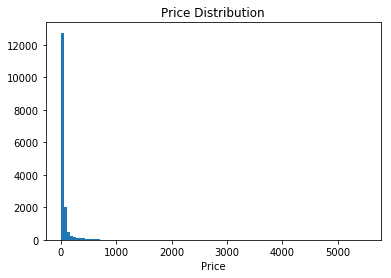

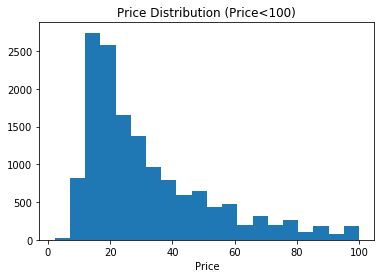

In [16]:
def PriceAnalysis():
    plt.hist(data['minPrice'],100)
    plt.xlabel('Price')
    plt.title('Price Distribution')
    plt.show()
    plt.hist(data[data['minPrice']<100]['minPrice'],20)
    plt.xlabel('Price')
    plt.title('Price Distribution (Price<100)')
    plt.show()
PriceAnalysis()

## 3.2 Varietal Analysis

Varietals with more than 200 wine products:

In [17]:
def varietalAnalysis():
    varietal=data.groupby(['Varietal']).size().sort_values(ascending=True)
    varietal[varietal>200].plot(kind="barh")
    plt.title('')
    plt.xlabel('Count')
varietalAnalysis()

Average price for varietals with more than 200 wine products:

In [18]:
def varietal_price():
    varietal=data.groupby(['Varietal']).size().sort_values(ascending=True)
    df = data.groupby(['Varietal'])['minPrice'].agg(np.mean)
    varietal_price = pd.DataFrame(df)
    varietal_price
    df_new = pd.DataFrame(varietal[varietal>200])
    df_new.merge(varietal_price, left_index=True, right_index=True)['minPrice'].plot(kind="barh")
    plt.title('Average Price for common varietal')
    plt.xlabel('Price($)')
varietal_price()

Number of varietals in different regions:

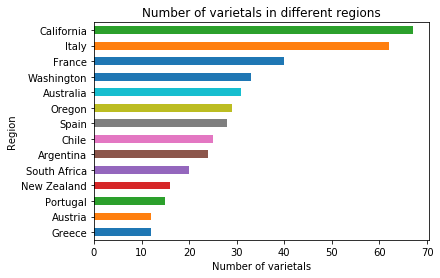

In [19]:
def varietal_region():
    varietal_country=data[['Country','Varietal']].drop_duplicates().groupby(['Country']).size().sort_values(ascending=True)
    varietal_country[varietal_country>10].plot(kind="barh")
    plt.title('Number of varietals in different regions')
    plt.xlabel('Number of varietals')
    plt.ylabel('Region')
varietal_region()

## 3.3 Region Analysis 

The plot shows the relationship between region, price and customers' ratings. Only 'StarRating' greater than zero is considered becuase zero means currently buyers have yet to give rating to the product.

In [20]:
def regionAnalysis():
    wine = data[data["StarRating"]>0]
    count = pd.DataFrame(wine.groupby('Country').agg(['count'])['Title']).reset_index()
    avg_price = pd.DataFrame(wine.groupby('Country')['Price'].agg(['mean'])).reset_index()
    avg_star = pd.DataFrame(wine.groupby('Country')['StarRating'].agg(['mean'])).reset_index()
    count['avg_price'] = avg_price['mean']
    count['avg_star'] = avg_star['mean']
    count_revised =  count.loc[count['count'] >= 5].reset_index()
    col = ['yellow','black','green','yellow','yellow','green',
        'green','green','green','green','blue','green','red','red','yellow','yellow',
        'yellow','yellow','black','yellow','yellow','green','red','blue','green',
        'yellow','yellow']
    plt.title('Rating vs Price by Region')
    plt.xlabel('Average Price')
    plt.ylabel('Average Rating')
    plt.scatter(x = count_revised['avg_price'], y = count_revised['avg_star'], s = count_revised['count'], c = col, alpha = 0.8)
    plt.text(41, 4.12, 'Carlifornia')
    plt.text(70, 4.12, 'France')
    plt.text(31, 4.09, 'Italy' )
    plt.text(22.64, 3.93, 'Spain')
    plt.text(32, 3.92, 'Australia')
    plt.text(32.65,4.14, 'Portugal')
    plt.text(26.54, 3.86, 'Chile')
    plt.text(16.83, 4.13, 'New Zealand')
    plt.text(27, 4.22, 'Oregon')
regionAnalysis()

## 3.4 Year Analysis 

The plot shows the relationship between price and year using line plot.

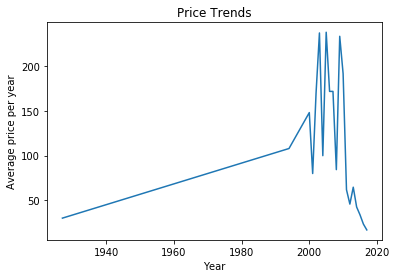

In [21]:
wine = data[data["StarRating"]>0]
year_price = pd.DataFrame(wine.groupby('Year')['Price'].agg(['mean'])).reset_index()
year_price
plt.xlabel('Year')
plt.ylabel('Average price per year')
plt.title('Price Trends')
plt.plot(year_price['Year'], year_price['mean'])

## 3.5 Professional Rating Analysis 

The section below analyzes professional ratings given by wine magzines. It visualize the relationship between professional rating, region and price using cross tab and bar plot.

In [22]:
def drop_columns(df, column_names):
    df = df.drop(column_names, axis = 1)
    return df
def get_groupby_counts(df, groups):
    result = df.groupby(groups).count()
    return result

In [23]:
df = drop_columns(data, ['Shopping_Link','Img_src'])
df = df[df["Professional Score"] > 0] 
#'Professional Score' is the mean score of all the professional rating. 
#Only items with positive score is considered because zero or null mean the item does not have professional score yet.

In [24]:
#Cross Tab for Region VS Professional Mean Score
professional_tab = pd.crosstab(df["Professional Score"], df['Country'], margins = True)
professional_tab

Country             Argentina  Australia  Austria  California  Chile  China  \
Professional Score                                                            
1.0                         0          0        0          23      0      0   
9.0                        48         37       10         521     24      0   
10.0                       10          5        0          62      4      0   
88.0                        3          1        0          13      1      0   
89.0                       21         21        1         180     11      0   
90.0                        0          0        0           4      1      0   
91.0                       38         41       10         435     34      0   
92.0                       46         66        7         509     29      0   
93.0                       30         55        2         382     13      1   
94.0                       12         31        1         221      7      0   
95.0                        8         25        2         167      0      0   
96.0                        6          6        2          93      2      0   
97.0                        1          2        0          77      1      0   
98.0                        0          3        0          51      0      0   
99.0                        0          3        0          36      1      0   
100.0                       0          0        0           9      0      0   
All                       223        296       35        2783    128      1   

Country             England  France  Germany  Greece  ...   Other  Other U.S.  \
Professional Score                                    ...                       
1.0                       0       4        1       0  ...       0           0   
9.0                       2     198       12       5  ...       1           1   
10.0                      0      61        1       0  ...       0           0   
88.0                      0       2        0       0  ...       0           0   
89.0                      0      56        1       0  ...       0           0   
90.0                      0       2        0       0  ...       0           0   
91.0                      1     271       10       6  ...       0           1   
92.0                      3     356        7       2  ...       0           0   
93.0                      3     286        5       0  ...       0           0   
94.0                      0     210        1       0  ...       0           0   
95.0                      0     152        4       0  ...       0           0   
96.0                      0     144        0       0  ...       0           0   
97.0                      1      83        1       0  ...       0           0   
98.0                      0      53        0       1  ...       0           0   
99.0                      0      34        0       0  ...       0           0   
100.0                     0      11        0       0  ...       0           0   
All                      10    1923       43      14  ...       1           2   

Country             Portugal  Slovenia  South Africa  Spain  Uruguay  \
Professional Score                                                     
1.0                        0         0             0      1        0   
9.0                       34         1            16     84        0   
10.0                       9         0             1     21        0   
88.0                       2         0             3      5        0   
89.0                       6         0             8     20        0   
90.0                       0         0             0      1        0   
91.0                      29         0             8     66        3   
92.0                      23         0            14     82        1   
93.0                      23         1             3     55        0   
94.0                      14         0             4     21        0   
95.0                      11         0             1      7        0   
96.0                  

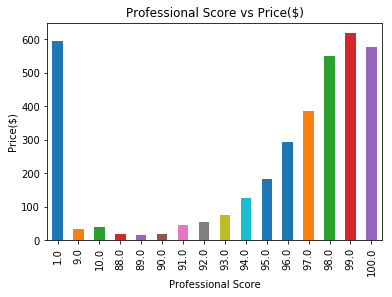

In [25]:
#Plot for Price vs Professional Mean Score
def professionalRating():
    professional_rating_price = data.groupby(['Professional Score']).Price.mean()
    professional_rating_price.plot.bar()
    plt.title('Professional Score vs Price($)')
    plt.ylabel('Price($)')
professionalRating()

## 3.5 Customer Rating Analysis 

This section shows the relationship between Customer rating (represented by 'StarRating' column in the dataset), year and price.

In [26]:
#Crosstab for Year vs Star Rating(customers' rating)
df = drop_columns(data, ['Shopping_Link','Img_src'])
df = df[df["StarRating"] > 0]
buyer_tab = pd.crosstab(df.StarRating, df.Year, margins = True)
buyer_tab
rating25 = pd.DataFrame(buyer_tab[3:4] + buyer_tab[0:1].values + buyer_tab[1:2].values + buyer_tab[2:3].values, columns = buyer_tab[0:1].columns)
rating25
rating30 = pd.DataFrame(buyer_tab[4:5].values + buyer_tab[5:6].values + buyer_tab[6:7].values + buyer_tab[7:8].values + buyer_tab[8:9], columns = buyer_tab[0:1].columns)
rating30
rating35 = pd.DataFrame(buyer_tab[9:10].values + buyer_tab[10:11].values + buyer_tab[11:12].values + buyer_tab[12:13].values + buyer_tab[13:14], columns = buyer_tab[0:1].columns)
rating35
rating40 = pd.DataFrame(buyer_tab[14:15].values + buyer_tab[15:16].values + buyer_tab[16:17].values + buyer_tab[17:18].values + buyer_tab[18:19], columns = buyer_tab[0:1].columns)
rating40
rating45 = pd.DataFrame(buyer_tab[19:20].values + buyer_tab[20:21].values + buyer_tab[21:22].values + buyer_tab[22:23].values + buyer_tab[23:24], columns = buyer_tab[0:1].columns)
rating45
rating50 = pd.DataFrame(buyer_tab[24:25].values + buyer_tab[25:26].values + buyer_tab[26:27].values + buyer_tab[27:28].values + buyer_tab[28:29], columns = buyer_tab[0:1].columns)
rating50
allogate_crosstab = rating25.append(rating30)
allogate_crosstab = allogate_crosstab.append(rating35)
allogate_crosstab = allogate_crosstab.append(rating40)
allogate_crosstab = allogate_crosstab.append(rating45)
allogate_crosstab = allogate_crosstab.append(rating50)
allogate_crosstab

Year        1927.0  1994.0  2000.0  2001.0  2002.0  2003.0  2004.0  2005.0  \
StarRating                                                                   
2.6              0       0       0       0       0       0       0       0   
3.1              0       0       0       0       0       0       0       1   
3.6              0       0       0       0       0       0       0       0   
4.1              0       0       1       1       1       1       0       2   
4.6              1       0       3       0       0       0       1       6   
All              1       2       4       1       7       3       1      13   

Year        2006.0  2007.0  ...   2009.0  2010.0  2011.0  2012.0  2013.0  \
StarRating                  ...                                            
2.6              0       0  ...        0       1       0       1       0   
3.1              0       0  ...        1       2       1       3       5   
3.6              1       0  ...        2       4       9      10      27   
4.1              1       1  ...        4       3      12      38      77   
4.6              5       2  ...       15      12      22      29      72   
All             11       7  ...       24      30      46      91     205   

Year        2014.0  2015.0  2016.0  2017.0   All  
StarRating                                        
2.6              1       1       2       0     6  
3.1              9       9       4       0    35  
3.6             45      81      62      11   253  
4.1            179     212     195      40   770  
4.6            149     173     154      49   695  
All            437     518     467     130  2005  

[6 rows x 21 columns]

In [27]:
#Plot for star rating vs price
def buyerRating():
    star_rating_price = data.groupby(['StarRating']).Price.mean()
    star_rating_price.plot.bar()
    plt.title('Star Rating vs Price($)')
    plt.xlabel('Star Ratings')
    plt.ylabel('Price($)')
buyerRating()

## 3.6 Popularity Analysis 

Below shows the bar plot for TOP15 most popular wine selected basefd on number of raters who gave star ratings. 
We assume that sales is proportional to number of raters

In [28]:
def popularityAnalysis():
    df = data.loc[:,['Title','numRater']]
    new_df = df.sort_values('numRater', ascending=False).head(15)
    sns.barplot(x='numRater', y='Title', data=new_df, orient='h')
    plt.title('Top 15 most popular wine')
    plt.xlabel('Number of Raters')
popularityAnalysis()

# 4. Overview for Users

This section aims to create a interactive UI. This section makes use of above plots to give users a statistical overview about the wines available for sale.

In [29]:
plot0 = interactive(popularityAnalysis)
plot1 = interactive(varietal_price)
plot2 = interactive(varietal_region)
plot3 = interactive(regionAnalysis)
plot4 = interactive(professionalRating)
plot5 = interactive(buyerRating)

In [30]:
children = [plot0,plot1, plot2, plot3, plot4,plot5]
tab = widgets.Tab()
tab.children = children
tab.set_title(0, 'Popular Wine')
tab.set_title(1, 'Varietal vs Price')
tab.set_title(2, 'Varietal vs Region')
tab.set_title(3, 'Region Overview')
tab.set_title(4, 'Professional Ratings Overview')
tab.set_title(5, 'Buyers Ratings Overview')
tab

Tab(children=(interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',))), _titles={'0': 'Popular Wine', '1': 'Varietal vs Price', '2': 'Varietal vs Region', '3': 'Region Overview', '4': 'Professional Ratings Overview', '5': 'Buyers Ratings Overview'})

# 5. Recommendation System

## --Recommend Products based on Users' prefernces

This section illustrates how the recommendation system of our website works. Users can search products by title, varietal, price range, year, region and taste. The program will give the closest matched results.

## 5.1 Search by Title 

Users can type in any products they want to search in the below search box. The program will search the whole product catalog and firstly give 100% matched results. Sometimes users might type in only part of a product title or different token sequence. The program can search all the products titles by token and calculate matching ratios. If the matching ratios are greater than 90, the program will return the products. All the returned products will be sorted in descending order based matching score and then displayed for users.

In [35]:
Search = widgets.Text(
    value= None,
    placeholder='Type something',
    description='Search:',
    disabled=False
)
Search

Text(value='', description='Search:', placeholder='Type something')

In [80]:
product_idx = {}
booleanVal_product=[None] * len(data)
#matching ratio score is calculated with the help of 'fuzzy wuzzy' package
for i in range(0, len(data)):
    ratio = fuzz.ratio(Search.value, data.iloc[i]['Title'])
    partial_ratio = fuzz.partial_ratio(Search.value, data.iloc[i]['Title'])
    token_ratio = fuzz.token_sort_ratio(Search.value,data.iloc[i]['Title'])
    if ratio == 100: 
        print(str(i) + ' ' +data.iloc[i]['Title'])
        product_idx[i] = ratio
        booleanVal_product[i] = True
    else:
        if partial_ratio >= 90:
            print(str(i) + ' ' +data.iloc[i]['Title'])
            product_idx[i] = partial_ratio
            booleanVal_product[i] = True
        elif token_ratio >= 90:
            print(str(i) + ' ' +data.iloc[i]['Title'])
            product_idx[i] = token_ratio
            booleanVal_product[i] = True
        else:
            booleanVal_product[i] = False

1284 Ruffino Prosecco
6645 Ruffino Prosecco (187ML Split)
7908 Ruffino Prosecco (375ML half-bottle)


In [81]:
df = data
df = df.loc[booleanVal_product,:]
df_product = pd.DataFrame(product_idx, index=['score']).T.sort_values(by='score',ascending=False)

In [82]:
index = list(df_product.index)
df_display = data.loc[index][['Title', 'minPrice', 'Professional Score', 'StarRating','numRater','Shopping_Link']]
df_display

Title  minPrice  Professional Score  \
1284                      Ruffino Prosecco      9.47                 NaN   
6645        Ruffino Prosecco (187ML Split)      7.99                 NaN   
7908  Ruffino Prosecco (375ML half-bottle)      9.99                 NaN   

      StarRating  numRater                                      Shopping_Link  
1284         4.1        76  https://www.wine.com/product/Ruffino-Prosecco/...  
6645         NaN         0  https://www.wine.com/product/Ruffino-Prosecco-...  
7908         NaN         0  https://www.wine.com/product/Ruffino-Prosecco-...

## 5.2 Search by Varietal 

Users can select varietal from the drop down list below. The program can display the introduction of the selected varietal and give recommendations on products of the varietal.

In [39]:
selectVarietal = widgets.Dropdown(
    options=list(tasteData.iloc[:,0].unique()),
    value = None,
    description='Varietal:'
)
selectVarietal

Dropdown(description='Varietal:', options=('Falanghina', 'Negroamaro', 'Montepulciano', 'Grillo', 'Vermouth', 'Non-Vintage Sparkling Wine', 'Malvasia', 'Junmai', 'Junmai-Daiginjo', 'Junmai-Ginjo', 'Rhone White Blends', 'Zinfandel', 'Arneis', 'Tannat', 'Furmint', 'Picpoul', 'Madeira', 'Verdelho', 'Pinot Blanc', 'Gewurztraminer', 'Semillon', 'Pedro XimÕ©nez', 'Touriga Nacional', 'White Zinfandel', 'Red Sparkling Wine', 'Sherry', 'Gruner Veltliner', 'Lambrusco', 'Viognier', 'Vernaccia', 'Greco', 'Riesling', 'Vermentino', 'Chenin Blanc', 'In Box Glassware', 'Bordeaux White Blends', 'Other White Blends', 'Other White Wine', 'Pinotage', 'Petite Sirah', 'Mourvedre', 'Malbec', 'Sauvignon Blanc', 'Nebbiolo', 'Barbera', 'Bordeaux Red Blends', 'Friulano', 'Verdicchio', 'Gamay', 'Garganega', 'Rhone Red Blends', 'Grenache', 'Pinot Noir', 'Cabernet Franc', 'Tuscan Blends', 'Roussanne', 'Merlot', 'Pinot Gris/Grigio', 'Cabernet Sauvignon', 'Syrah/Shiraz', 'Tempranillo', 'Sangiovese', 'Chardonnay', 'Mixed Collections', 'Other Red Blends', 'Other Red Wine', 'Melon de Bourgogne', 'Assyrtiko', 'Aglianico', 'Verdejo', 'Grechetto', 'Muller Thurgau', 'Valdiguie', 'Lagrein', 'Aligote', 'Corvina', 'Zweigelt', 'Cortese', 'Trebbiano', 'Albarino', 'Godello', 'Petit Verdot', 'Dolcetto', 'Muscat', 'Carmenere', 'Bonarda', 'Cinsault', 'Port', 'Other Dessert', 'Torrontes', 'Carignan', 'Vintage Sparkling Wine', 'RosÕ© Sparkling Wine', 'Marsanne', 'RosÕ©', 'Nero d&apos;Avola', 'Primitivo', 'Grenache Blanc'), value=None)

In [40]:
#Display Introduction
try:
    #varietal_intro[varietal_filename]
    varietal_filename = selectVarietal.value+".txt"
    print(varietal_intro[varietal_filename])
except:
    print("No Results Matched")


Chardonnay
Grown in cool climates, the variety delivers apple, pear and citrus fruit flavors and refreshing acidity. More moderate climates produce riper Chardonnay grapes with medium acidity and stone-fruit flavors. In warm regions, the typical Chardonnay taste is tropical, with pineapple and banana flavors, balanced with medium acidity.

In California, while an increasing number of winemakers offer unoaked or “naked” Chardonnays that more closely reflect Old World wine styles, most are dedicated to an oaky, New World style. The state’s many warm regions produce wines with high alcohol and full body, with cream, butterscotch, oak, peach and tropical fruit flavors. Cooler enclaves, such as Napa and Sonoma’s Carneros and Russian River Valley regions, deliver a more restrained Chardonnay.

Winemaking techniques add important secondary flavors to Chardonnay.

The popular buttery Chardonnay, the oaky Chardonnay with its devoted followers, is created by aging the wine with oak. This process

In [73]:
df = data
#use a boolean variable with the same length of data to mark which row meets the selection.
if selectVarietal.value: 
    boolVal_varietal = (df['Varietal'] == selectVarietal.value)
    df.loc[boolVal_varietal,:]
else:
    boolVal_varietal = (df['Varietal'] != 0)
    print("No result matched")
df.loc[boolVal_varietal,:]

Title    Year    Varietal  \
3                               Rombauer Chardonnay 2017  2017.0  Chardonnay   
81                             Cakebread Chardonnay 2016  2016.0  Chardonnay   
87                     La Crema Monterey Chardonnay 2016  2016.0  Chardonnay   
93                   Grgich Hills Estate Chardonnay 2014  2014.0  Chardonnay   
126                Pahlmeyer Napa Valley Chardonnay 2016  2016.0  Chardonnay   
149                    Talbott Kali-Hart Chardonnay 2016  2016.0  Chardonnay   
158         Hartford Court Russian River Chardonnay 2016  2016.0  Chardonnay   
166                              Raeburn Chardonnay 2016  2016.0  Chardonnay   
179    Kendall-Jackson Vintner&apos;s Reserve Chardon...  2016.0  Chardonnay   
185                   J. Lohr Riverstone Chardonnay 2016  2016.0  Chardonnay   
186                           Far Niente Chardonnay 2017  2017.0  Chardonnay   
198    Domaine Comtesse de Cherisey Puligny-Montrache...  2015.0  Chardonnay   
199            Leeuwin Estate Art Series Chardonnay 2014  2014.0  Chardonnay   
202    Domaine Comtesse de Cherisey Meursault-Blagny ...  2015.0  Chardonnay   
210    Frank Family Vineyards Lewis Vineyard Reserve ...  2015.0  Chardonnay   
212                             ZD Wines Chardonnay 2016  2016.0  Chardonnay   
216      Lapostolle Casa Grand Selection Chardonnay 2016  2016.0  Chardonnay   
222     Mer Soleil Santa Barbara Reserve Chardonnay 2015  2015.0  Chardonnay   
234                La Crema Sonoma Coast Chardonnay 2016  2016.0  Chardonnay   
240                             Wayfarer Chardonnay 2015  2015.0  Chardonnay   
249                   Cambria Benchbreak Chardonnay 2015  2015.0  Chardonnay   
251    Joseph Phelps Freestone Vineyards Sonoma Coast...  2016.0  Chardonnay   
264    La Chablisienne Chablis Premier Cru Cote de Le...  2014.0  Chardonnay   
273    Mer Soleil Santa Lucia Highlands Reserve Chard...  2016.0  Chardonnay   
284             Patz & Hall Sonoma Coast Chardonnay 2015  2015.0  Chardonnay   
325                 Flowers Sonoma Coast Chardonnay 2016  2016.0  Chardonnay   
331    CrossBarn by Paul Hobbs Sonoma Coast Chardonna...  2016.0  Chardonnay   
333          Mount Eden Vineyards Estate Chardonnay 2014  2014.0  Chardonnay   
334    Alain Chavy Chassagne-Montrachet La Maltroie P...  2012.0  Chardonnay   
343    Bouchard Aine & Fils Meursault Premier Cru Les...  2014.0  Chardonnay   
...                                                  ...     ...         ...   
16010       Marcassin Marcassin Vineyard Chardonnay 2007  2007.0  Chardonnay   
16016          Aubert Sugar Shack Estate Chardonnay 2013  2013.0  Chardonnay   
16025                     Kooyong Estate Chardonnay 2016  2016.0  Chardonnay   
16027           Domaine Faiveley Puligny Montrachet 2015  2015.0  Chardonnay   
16028  Aubert UV-SL Vineyard Chardonnay (1.5 Liter Ma...  2015.0  Chardonnay   
16031  Rivers-Marie B. Thieriot Vineyard Chardonnay 2013  2013.0  Chardonnay   
16032  Hamacher Wines Cuvee Forets Diverses Chardonna...  2012.0  Chardonnay   
16037            Bravium Abbasi Vineyard Chardonnay 2013  2013.0  Chardonnay   
16089                   Vignai da Duline Chardonnay 2011  2011.0  Chardonnay   
16111                     Wrath Ex Anima Chardonnay 2014  2014.0  Chardonnay   
16114                     Etude Carneros Chardonnay 2013  2013.0  Chardonnay   
16118  Domaine Vincent Girardin Pouilly Fuisse Les Vi...  2015.0  Chardonnay   
16119             Bethel Heights Casteel Chardonnay 2013  2013.0  Chardonnay   
16132                Stoneleigh Latitude Chardonnay 2013  2013.0  Chardonnay   
16138               Buena Vista Carneros Chardonnay 2015  2015.0  Chardonnay   
16163               Billaud-Simon Bougros Grand Cru 2015  2015.0  Chardonnay   
16169                         Zuccardi Q Chardonnay 2012  2012.0  Chardonnay   
16178             Byron Nielson Vineyard Chardonnay 2014  2014.0  Chardonnay   
16202  Giesen The Fuder Clayvin Single Vineyard Cha

## 5.3 Search by Price Range 

Users can see the products within their desired price range by adjusting the slider below.

In [42]:
selectPrice = widgets.FloatRangeSlider(
    value=None,
    min=0,
    max=5500.0,
    step=0.1,
    description='Price Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
selectPrice

FloatRangeSlider(value=(1375.0, 4125.0), continuous_update=False, description='Price Range:', max=5500.0)

In [72]:
selectPrice.value
minPrice = selectPrice.value[0]
maxPrice = selectPrice.value[1]
df = data

boolVal_price = (df['Price']>=minPrice) & (df['Price']<=maxPrice)
if not any(boolVal_price): 
    print('No results matched')
else: 
    df.loc[boolVal_price,['Title','minPrice','Taste','Year','Country','Professional Score','StarRating','Shopping_Link']]
#show all the products between the price range
df.loc[boolVal_price,['Title','minPrice','Taste','Year','Country','Professional Score','StarRating','Shopping_Link']] 

Title  minPrice  \
0             Caymus Napa Valley Cabernet Sauvignon 2016     79.99   
1                        Dom Perignon with Gift Box 2009    189.97   
2                                         Ornellaia 2015    219.99   
3                               Rombauer Chardonnay 2017     36.99   
4      Domaine de la Janasse Chateauneuf-du-Pape Cuve...     79.99   
5         Silver Oak Napa Valley Cabernet Sauvignon 2013    114.99   
6             Duckhorn Vineyards 90+ Point Wine Gift Set    154.99   
7      Tour Saint Christophe Les Terrasses de Saint C...     21.99   
8                        Tua Rita Redigaffi Toscana 2015    299.99   
9           Duckhorn Napa Valley Cabernet Sauvignon 2015     64.99   
10                Joseph Phelps Insignia 2014 6 Pack OWC   1200.00   
11                                   Dominus Estate 2015    299.99   
12               Scattered Peaks Cabernet Sauvignon 2015     34.99   
13     Silver Oak Alexander Valley Cabernet Sauvignon...     74.99   
14          Chappellet Signature Cabernet Sauvignon 2015     54.99   
15                      Veuve Clicquot Yellow Label Brut     29.99   
16             La Rioja Alta Gran Reserva 904 Tinto 2009     64.99   
17                              Antinori Tignanello 2015    109.00   
18     Kathryn Hall Cabernet Sauvignon 6-Pack + BONUS...    949.99   
19     Hall Eighteen Seventy-Three Cabernet Sauvignon...     74.99   
20     Robert Mondavi To Kalon Vineyard Reserve Caber...    119.99   
21                                        Quintessa 2015    174.99   
22      Caymus Special Selection Cabernet Sauvignon 2014    179.99   
23     Chateau Ste. Michelle Cold Creek Vineyard Cabe...     19.99   
24                  Silver Oak Trophy Reds Wine Gift Set    139.99   
25                           90+ Point Red Wine Gift Set     49.99   
26     Quinta do Crasto Douro Red Reserva Old Vines 2015     39.99   
27     Raymond Reserve Selection Cabernet Sauvignon 2015     39.99   
28                       Tenuta San Guido Sassicaia 2015    209.99   
29                   Austin Hope Cabernet Sauvignon 2015     53.99   
...                                                  ...       ...   
16295                         Kettmeir Pinot Grigio 2017     21.99   
16296                    Olga Raffault Les Picasses 2013     31.99   
16297     Santa Margherita Chianti Classico Riserva 2014     26.99   
16298                       Kettmeir Muller Thurgau 2017     21.99   
16299        St. Clair Vinos de los Muertos Blanco Dulce      8.99   
16300     Lamole di Lamole Chianti Classico Riserva 2014     26.99   
16301         Feudo Zirtari Nero d&apos;Avola/Syrah 2015     11.99   
16302                        Sassoregale Sangiovese 2016     15.99   
16303  Concha y Toro Casillero Del Diablo Cabernet Sa...     12.99   
16304  Gaja Pieve Santa Restituta Brunello di Montalc...     89.99   
16305  Promise Rutherford Cabernet Sauvignon (Premier...    249.99   
16306              Karthauserhof Riesling QbA Ruwer 2016     19.99   
16307                         Kettmeir Pinot Bianco 2017     21.99   
16308  Marc Kreydenweiss CostiÕ_Õres-de-NÕ_ëÎmes Per...      9.98   
16309  Antinori Villa Antinori Chianti Classico Riser...     21.98   
16310    White Nike Wine.com Hat (FREE ground shipping!)     19.99   
16311           Antinori Guado al Tasso Il Bruciato 2015     19.98   
16312       Mas Janeil Cotes du Roussillon Villages 2012     15.99   
16313                  Chalk Hill Estate Pinot Noir 2014     37.99   
16314  Ruffino Ducale Chianti Classico Riserva (375ML...      8.98   
16315  Clos Du Val A Cappella Cabernet Sauvignon (Pre...    199.99   
16316                                Verite La Muse 2013    379.98   
16317  ONEHOPE Elway&apos;s Reserve Cabernet Sauvigno...     48.99   
16318                  Guigal La Mouline Cote Rotie 2012    299.99   
16319                   Guigal La Turque Cote Rotie 2012    299.99   
16320  Andrew Rich Age of Majority Pinot Noir (Willam...     

## 5.4 Search by Region 

Users can select region from the drop down list to see all the products from the region.

In [44]:
selectRegion = widgets.Dropdown(
    options= list(data['Country'].unique()),
    value = None,
    description='Region:'
)
selectRegion

Dropdown(description='Region:', options=('California', 'France', 'Italy', 'Spain', 'Washington', 'Other', 'Portugal', 'Oregon', nan, 'New Zealand', 'Australia', 'Argentina', 'Chile', 'South Africa', 'New Mexico', 'Germany', 'Greece', 'Uruguay', 'Canada', 'New York', 'Japan', 'Austria', 'Macedonia (FYROM)', 'China', 'Slovenia', 'Hungary', 'England', 'Lebanon', 'Brazil', 'Israel', 'Other U.S.', 'Croatia', 'Virginia', 'Turkey'), value=None)

In [74]:
#Use a boolean variable with same length as data to mark which row meets the requirements.
if selectRegion.value:
    boolVal_region = (df['Country'] == selectRegion.value)
    df.loc[boolVal_region,['Title','minPrice','Taste','Year','Professional Score','StarRating','Shopping_Link']]
else:
    boolVal_region = (df['Country'] != 0)
    print("No results matched")

df.loc[boolVal_region,['Title','minPrice','Taste','Year','Professional Score','StarRating','Shopping_Link']]

Title  minPrice  \
0             Caymus Napa Valley Cabernet Sauvignon 2016     79.99   
3                               Rombauer Chardonnay 2017     36.99   
5         Silver Oak Napa Valley Cabernet Sauvignon 2013    114.99   
6             Duckhorn Vineyards 90+ Point Wine Gift Set    154.99   
9           Duckhorn Napa Valley Cabernet Sauvignon 2015     64.99   
10                Joseph Phelps Insignia 2014 6 Pack OWC   1200.00   
11                                   Dominus Estate 2015    299.99   
12               Scattered Peaks Cabernet Sauvignon 2015     34.99   
13     Silver Oak Alexander Valley Cabernet Sauvignon...     74.99   
14          Chappellet Signature Cabernet Sauvignon 2015     54.99   
18     Kathryn Hall Cabernet Sauvignon 6-Pack + BONUS...    949.99   
19     Hall Eighteen Seventy-Three Cabernet Sauvignon...     74.99   
20     Robert Mondavi To Kalon Vineyard Reserve Caber...    119.99   
21                                        Quintessa 2015    174.99   
22      Caymus Special Selection Cabernet Sauvignon 2014    179.99   
27     Raymond Reserve Selection Cabernet Sauvignon 2015     39.99   
29                   Austin Hope Cabernet Sauvignon 2015     53.99   
30                           Joseph Phelps Insignia 2015    229.97   
33        Frank Family Vineyards Cabernet Sauvignon 2015     53.99   
34             Hall Kathryn Hall Cabernet Sauvignon 2015    174.99   
36     Chappellet Pritchard Hill Estate Vineyard Cabe...    239.99   
39     Kendall-Jackson Grand Reserve Cabernet Sauvign...     19.97   
43                      Orin Swift Cellars Papillon 2015     69.99   
44           The Prisoner Wine Company The Prisoner 2016     39.99   
48        Shafer Hillside Select Cabernet Sauvignon 2014    309.99   
55                         Paraduxx Proprietary Red 2015     39.99   
56                DAOU Vineyards Cabernet Sauvignon 2016     25.99   
59             Goldeneye Anderson Valley Pinot Noir 2015     44.95   
60         Shafer One Point Five Cabernet Sauvignon 2015     94.99   
62             Hall Ellie&apos;s Cabernet Sauvignon 2014     74.99   
...                                                  ...       ...   
16257  Frazier Lupine Hill Vineyard Cabernet Sauvigno...     49.98   
16258  Joseph Phelps Backus Vineyard Cabernet Sauvign...    229.98   
16259         CK Lamb Grandma&apos;s Vineyard Syrah 2005     19.98   
16260                       Cellar No. 8 Chardonnay 2011      8.99   
16261                              Four Cairn Syrah 2009     29.97   
16262  Pessagno Winery Garys&apos; Vineyard Pinot Noi...     34.97   
16263  Joseph Phelps Backus Vineyard Cabernet Sauvign...    229.98   
16264  Gemstone Vineyard Facets Of Gemstone Estate Re...     79.97   
16265                         Lambert Bridge Merlot 2009     49.97   
16266             Sine Qua Non Rattrapante Grenache 2012    599.98   
16267                  Herb Lamb Cabernet Sauvignon 2003     99.98   
16269          Wild Horse Cheval Sauvage Pinot Noir 2013     46.99   
16271          Veedercrest Ruhl Vineyard Chardonnay 2010     17.98   
16273               Calera Central Coast Chardonnay 2015     17.99   
16276      Goosecross State Lane Cabernet Sauvignon 2010     53.98   
16277                                Dierberg Syrah 2012     59.98   
16279  Sine Qua Non Patine Grenache Eleven Confession...    399.99   
16280            Point Concepcion Czar & Rey Merlot 2012     16.98   
16283                    VML Winery Sauvignon Blanc 2013     16.99   
16287  Martin Ray Tina Marie Vineyard Pinot Noir (Son...     59.99   
16288                  Five Sons Cabernet Sauvignon 2009    124.98   
16289             Cherry Pie Cherry Tart Chardonnay 2014     12.98   
16290  McManis Family Vineyards River Junction Viogni...      9.99   
16305  Promise Rutherford Cabernet Sauvignon (Premier...    249.99   
16313                  Chalk Hill Estate Pinot Noir 2014     37.99   
16315  Clos Du Val A Cappella Cabernet Sauvignon (Pre...    1

## 5.5 Search by Year 

Users can select range of production year to see producs using below slider.

In [50]:
selectYear = widgets.IntRangeSlider(
    value=[1927, 2018],
    min=1927,
    max=2018,
    step=1,
    description='Year Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
selectYear

IntRangeSlider(value=(1927, 2018), continuous_update=False, description='Year Range:', max=2018, min=1927)

In [77]:
df = data
minYear = selectYear.value[0]
maxYear = selectYear.value[1]
boolVal_yr = (df['Year'] >= minYear) & (df['Year'] <= maxYear)
if not any(boolVal_yr): 
    print('No results matched')
else:
    #df.loc[boolVal_yr,:]
    df.loc[boolVal_yr,['Title','Year','minPrice','Varietal','Professional Score','StarRating','Shopping_Link']]
df.loc[boolVal_yr,['Title','Year','minPrice','Varietal','Professional Score','StarRating','Shopping_Link']]

Title    Year  minPrice  \
0             Caymus Napa Valley Cabernet Sauvignon 2016  2016.0     79.99   
1                        Dom Perignon with Gift Box 2009  2009.0    189.97   
2                                         Ornellaia 2015  2015.0    219.99   
3                               Rombauer Chardonnay 2017  2017.0     36.99   
4      Domaine de la Janasse Chateauneuf-du-Pape Cuve...  2016.0     79.99   
5         Silver Oak Napa Valley Cabernet Sauvignon 2013  2013.0    114.99   
7      Tour Saint Christophe Les Terrasses de Saint C...  2014.0     21.99   
8                        Tua Rita Redigaffi Toscana 2015  2015.0    299.99   
9           Duckhorn Napa Valley Cabernet Sauvignon 2015  2015.0     64.99   
10                Joseph Phelps Insignia 2014 6 Pack OWC  2014.0   1200.00   
11                                   Dominus Estate 2015  2015.0    299.99   
12               Scattered Peaks Cabernet Sauvignon 2015  2015.0     34.99   
13     Silver Oak Alexander Valley Cabernet Sauvignon...  2014.0     74.99   
14          Chappellet Signature Cabernet Sauvignon 2015  2015.0     54.99   
16             La Rioja Alta Gran Reserva 904 Tinto 2009  2009.0     64.99   
17                              Antinori Tignanello 2015  2015.0    109.00   
19     Hall Eighteen Seventy-Three Cabernet Sauvignon...  2014.0     74.99   
20     Robert Mondavi To Kalon Vineyard Reserve Caber...  2014.0    119.99   
21                                        Quintessa 2015  2015.0    174.99   
22      Caymus Special Selection Cabernet Sauvignon 2014  2014.0    179.99   
23     Chateau Ste. Michelle Cold Creek Vineyard Cabe...  2013.0     19.99   
26     Quinta do Crasto Douro Red Reserva Old Vines 2015  2015.0     39.99   
27     Raymond Reserve Selection Cabernet Sauvignon 2015  2015.0     39.99   
28                       Tenuta San Guido Sassicaia 2015  2015.0    209.99   
29                   Austin Hope Cabernet Sauvignon 2015  2015.0     53.99   
30                           Joseph Phelps Insignia 2015  2015.0    229.97   
31                      Louis Roederer Cristal Brut 2008  2008.0    259.97   
32                     Substance Cabernet Sauvignon 2016  2016.0     14.99   
33        Frank Family Vineyards Cabernet Sauvignon 2015  2015.0     53.99   
34             Hall Kathryn Hall Cabernet Sauvignon 2015  2015.0    174.99   
...                                                  ...     ...       ...   
16293  Jean-Paul Brun Domaine des Terres Dorees Cote-...  2016.0     26.99   
16294             Lamole di Lamole Chianti Classico 2015  2015.0     21.99   
16295                         Kettmeir Pinot Grigio 2017  2017.0     21.99   
16296                    Olga Raffault Les Picasses 2013  2013.0     31.99   
16297     Santa Margherita Chianti Classico Riserva 2014  2014.0     26.99   
16298                       Kettmeir Muller Thurgau 2017  2017.0     21.99   
16300     Lamole di Lamole Chianti Classico Riserva 2014  2014.0     26.99   
16301         Feudo Zirtari Nero d&apos;Avola/Syrah 2015  2015.0     11.99   
16302                        Sassoregale Sangiovese 2016  2016.0     15.99   
16303  Concha y Toro Casillero Del Diablo Cabernet Sa...  2017.0     12.99   
16304  Gaja Pieve Santa Restituta Brunello di Montalc...  2013.0     89.99   
16305  Promise Rutherford Cabernet Sauvignon (Premier...  2009.0    249.99   
16306              Karthauserhof Riesling QbA Ruwer 2016  2016.0     19.99   
16307                         Kettmeir Pinot Bianco 2017  2017.0     21.99   
16308  Marc Kreydenweiss CostiÕ_Õres-de-NÕ_ëÎmes Per...  2006.0      9.98   
16309  Antinori Villa Antinori Chianti Classico Riser...  2012.0     21.98   
16311           Antinori Guado al Tasso Il Bruciato 2015  2015.0     19.98   
16312       Mas Janeil Cotes du Roussillon Villages 2012  2012.0     15.99   
16313                  Chalk Hill Estate Pinot Noir 2014  2014.0     37.99   
16314  Ruffino Ducale Chianti Classico Riserva (375ML...  2012.0      8.9

## 5.6 Search by Taste 

Users can select mutiple tastes, all the products with selected tastes will be showed. Taste is greatly associated with varietal. We summarize taste for each varietal and integrate the taste with the data of all available products. Since many users do not have sufficient knowledge about wine, they can select taste to choose wine by using our website/app.

In [54]:
#Creat a list object for taste.
Tastes=['all']
for taste in list(tasteData.iloc[:,1].unique()):
    for s in taste.split(','):
        Tastes.append(s.strip())
Tastes=list(set(Tastes))
Tastes.sort()
Tastes[0]

'all'

In [55]:
selectTaste = widgets.SelectMultiple(
    options= Tastes,
    value=['all'],
    rows=10,
    description='Taste:',
    disabled=False
)
selectTaste

SelectMultiple(description='Taste:', index=(0,), options=('all', 'almond', 'berry', 'blossom', 'chocolatey', 'citrusy', 'dry', 'floral', 'fruity', 'full_body', 'herb', 'high_acidity', 'high_tannin', 'lemon', 'light_body', 'low_acidity', 'low_tannin', 'marine', 'medium_acidity', 'medium_body', 'medium_tannin', 'melon', 'mint', 'off-dry', 'other', 'peach', 'pepper', 'rice', 'smoky', 'smooth', 'sweet', 'tropical fruity'), rows=10, value=('all',))

In [59]:
#user data 
boolVal_taste = pd.notnull(data['Title'])
if 'all' not in selectTaste.value:
    for index in data.index:
        t=data.loc[index]['Taste']
        if pd.isnull(t):
            boolVal_taste[index]=False
        else:
            b=True
            for taste in selectTaste.value:
                b=b&(taste in t)
            if not b:
                b=True
                for taste in t.split(','):
                    b=b&(taste.strip() in selectTaste.value)
                    boolVal_taste[index]=b
    if not boolVal_taste.any():
        print("No results matched")

data.loc[boolVal_taste,['Title','Year','Varietal','Country','Professional Score','StarRating','Taste','Shopping_Link']]

Title    Year  \
0             Caymus Napa Valley Cabernet Sauvignon 2016  2016.0   
1                        Dom Perignon with Gift Box 2009  2009.0   
2                                         Ornellaia 2015  2015.0   
3                               Rombauer Chardonnay 2017  2017.0   
4      Domaine de la Janasse Chateauneuf-du-Pape Cuve...  2016.0   
5         Silver Oak Napa Valley Cabernet Sauvignon 2013  2013.0   
6             Duckhorn Vineyards 90+ Point Wine Gift Set     NaN   
7      Tour Saint Christophe Les Terrasses de Saint C...  2014.0   
8                        Tua Rita Redigaffi Toscana 2015  2015.0   
9           Duckhorn Napa Valley Cabernet Sauvignon 2015  2015.0   
10                Joseph Phelps Insignia 2014 6 Pack OWC  2014.0   
11                                   Dominus Estate 2015  2015.0   
12               Scattered Peaks Cabernet Sauvignon 2015  2015.0   
13     Silver Oak Alexander Valley Cabernet Sauvignon...  2014.0   
14          Chappellet Signature Cabernet Sauvignon 2015  2015.0   
15                      Veuve Clicquot Yellow Label Brut     NaN   
16             La Rioja Alta Gran Reserva 904 Tinto 2009  2009.0   
17                              Antinori Tignanello 2015  2015.0   
18     Kathryn Hall Cabernet Sauvignon 6-Pack + BONUS...     NaN   
19     Hall Eighteen Seventy-Three Cabernet Sauvignon...  2014.0   
20     Robert Mondavi To Kalon Vineyard Reserve Caber...  2014.0   
21                                        Quintessa 2015  2015.0   
22      Caymus Special Selection Cabernet Sauvignon 2014  2014.0   
23     Chateau Ste. Michelle Cold Creek Vineyard Cabe...  2013.0   
24                  Silver Oak Trophy Reds Wine Gift Set     NaN   
25                           90+ Point Red Wine Gift Set     NaN   
26     Quinta do Crasto Douro Red Reserva Old Vines 2015  2015.0   
27     Raymond Reserve Selection Cabernet Sauvignon 2015  2015.0   
28                       Tenuta San Guido Sassicaia 2015  2015.0   
29                   Austin Hope Cabernet Sauvignon 2015  2015.0   
...                                                  ...     ...   
16295                         Kettmeir Pinot Grigio 2017  2017.0   
16296                    Olga Raffault Les Picasses 2013  2013.0   
16297     Santa Margherita Chianti Classico Riserva 2014  2014.0   
16298                       Kettmeir Muller Thurgau 2017  2017.0   
16299        St. Clair Vinos de los Muertos Blanco Dulce     NaN   
16300     Lamole di Lamole Chianti Classico Riserva 2014  2014.0   
16301         Feudo Zirtari Nero d&apos;Avola/Syrah 2015  2015.0   
16302                        Sassoregale Sangiovese 2016  2016.0   
16303  Concha y Toro Casillero Del Diablo Cabernet Sa...  2017.0   
16304  Gaja Pieve Santa Restituta Brunello di Montalc...  2013.0   
16305  Promise Rutherford Cabernet Sauvignon (Premier...  2009.0   
16306              Karthauserhof Riesling QbA Ruwer 2016  2016.0   
16307                         Kettmeir Pinot Bianco 2017  2017.0   
16308  Marc Kreydenweiss CostiÕ_Õres-de-NÕ_ëÎmes Per...  2006.0   
16309  Antinori Villa Antinori Chianti Classico Riser...  2012.0   
16310    White Nike Wine.com Hat (FREE ground shipping!)     NaN   
16311           Antinori Guado al Tasso Il Bruciato 2015  2015.0   
16312       Mas Janeil Cotes du Roussillon Villages 2012  2012.0   
16313                  Chalk Hill Estate Pinot Noir 2014  2014.0   
16314  Ruffino Ducale Chianti Classico Riserva (375ML...  2012.0   
16315  Clos Du Val A Cappella Cabernet Sauvignon (Pre...  2011.0   
16316                                Verite La Muse 2013  2013.0   
16317  ONEHOPE Elway&apos;s Reserve Cabernet Sauvigno...  2013.0   
16318                  Guigal La Mouline Cote Rotie 2012  2012.0   
16319                   Guigal La Turque Cote Rotie 2012  2012.0   
16320  Andrew Rich Age of Majority Pinot Noir (Willam...  2015.0   
16321                            Mouton Cadet Blanc 2014  2014.0   
16322  Mount Veeder Winery Estate Caber

## 5.7 Search by Varietal, Year, Taste and Region

This section gives search results considering varietal, year, taste and region together.

In [63]:
boolVal_yr
boolVal_price
boolVal_varietal
boolVal_region
boolVal_taste

boolVal = []
for i in range(0, len(data)):
    boolVal.append(all([boolVal_yr[i], boolVal_price[i],boolVal_varietal[i],boolVal_region[i],boolVal_taste[i]]))
df = data 
boolVal
if len(data.loc[boolVal,:])>0: data.loc[boolVal,:]
else: print("No Results Matched")

data.loc[boolVal,['Title','Year','Varietal','Taste','minPrice','Professional Score','StarRating','Shopping_Link']]

Title    Year    Varietal  \
3                               Rombauer Chardonnay 2017  2017.0  Chardonnay   
81                             Cakebread Chardonnay 2016  2016.0  Chardonnay   
87                     La Crema Monterey Chardonnay 2016  2016.0  Chardonnay   
93                   Grgich Hills Estate Chardonnay 2014  2014.0  Chardonnay   
126                Pahlmeyer Napa Valley Chardonnay 2016  2016.0  Chardonnay   
149                    Talbott Kali-Hart Chardonnay 2016  2016.0  Chardonnay   
158         Hartford Court Russian River Chardonnay 2016  2016.0  Chardonnay   
166                              Raeburn Chardonnay 2016  2016.0  Chardonnay   
179    Kendall-Jackson Vintner&apos;s Reserve Chardon...  2016.0  Chardonnay   
185                   J. Lohr Riverstone Chardonnay 2016  2016.0  Chardonnay   
186                           Far Niente Chardonnay 2017  2017.0  Chardonnay   
210    Frank Family Vineyards Lewis Vineyard Reserve ...  2015.0  Chardonnay   
212                             ZD Wines Chardonnay 2016  2016.0  Chardonnay   
222     Mer Soleil Santa Barbara Reserve Chardonnay 2015  2015.0  Chardonnay   
234                La Crema Sonoma Coast Chardonnay 2016  2016.0  Chardonnay   
240                             Wayfarer Chardonnay 2015  2015.0  Chardonnay   
249                   Cambria Benchbreak Chardonnay 2015  2015.0  Chardonnay   
251    Joseph Phelps Freestone Vineyards Sonoma Coast...  2016.0  Chardonnay   
273    Mer Soleil Santa Lucia Highlands Reserve Chard...  2016.0  Chardonnay   
284             Patz & Hall Sonoma Coast Chardonnay 2015  2015.0  Chardonnay   
325                 Flowers Sonoma Coast Chardonnay 2016  2016.0  Chardonnay   
331    CrossBarn by Paul Hobbs Sonoma Coast Chardonna...  2016.0  Chardonnay   
333          Mount Eden Vineyards Estate Chardonnay 2014  2014.0  Chardonnay   
363                    Chalk Hill Estate Chardonnay 2015  2015.0  Chardonnay   
367                     Ojai Bien Nacido Chardonnay 2016  2016.0  Chardonnay   
382         Rombauer Chardonnay (375ML half-bottle) 2017  2017.0  Chardonnay   
395                   JaM Cellars Butter Chardonnay 2016  2016.0  Chardonnay   
434                               Meiomi Chardonnay 2016  2016.0  Chardonnay   
446             The Calling Dutton Ranch Chardonnay 2016  2016.0  Chardonnay   
449                    Newton Unfiltered Chardonnay 2015  2015.0  Chardonnay   
...                                                  ...     ...         ...   
15797           Miner Family Napa Valley Chardonnay 2016  2016.0  Chardonnay   
15805             Benziger Sonoma County Chardonnay 2016  2016.0  Chardonnay   
15810            Sojourn Durell Vineyard Chardonnay 2012  2012.0  Chardonnay   
15854                  Jekel Gravelstone Chardonnay 2011  2011.0  Chardonnay   
15858                 Reata Sonoma Coast Chardonnay 2016  2016.0  Chardonnay   
15867  Aubert Lauren Vineyard Chardonnay (1.5 Liter M...  2012.0  Chardonnay   
15895                    Rutherford Hill Chardonnay 2014  2014.0  Chardonnay   
15901           Beringer Private Reserve Chardonnay 2016  2016.0  Chardonnay   
15931      Aubert Eastside Russian River Chardonnay 2013  2013.0  Chardonnay   
15945             Aubert Lauren Vineyard Chardonnay 2014  2014.0  Chardonnay   
15970             Aubert Lauren Vineyard Chardonnay 2012  2012.0  Chardonnay   
15986  Aubert Lauren Vineyard Chardonnay (1.5 Liter M...  2015.0  Chardonnay   
16002             Aubert Lauren Vineyard Chardonnay 2015  2015.0  Chardonnay   
16010       Marcassin Marcassin Vineyard Chardonnay 2007  2007.0  Chardonnay   
16016          Aubert Sugar Shack Estate Chardonnay 2013  2013.0  Chardonnay   
16028  Aubert UV-SL Vineyard Chardonnay (1.5 Liter Ma...  2015.0  Chardonnay   
16031  Rivers-Marie B. Thieriot Vineyard Chardonnay 2013  2013.0  Chardonnay   
16037            Bravium Abbasi Vineyard Chardonnay 2013  2013.0  Chardonnay   
16111                     Wrath Ex Anima Chardonnay

## 5.8 Compare Prices 

Given the product title in the wine catalog, search in the data_compare dataframe, show all available prices in different online stores:

In [85]:
def compare_price(search_title):
    i=data[data['Title']==search_title].index[0]
    price_list=data[data['Title']==search_title][['Title','Price','Shopping_Link']]
    price_list['Website']='Wine.com'
    price_list2=data_compare[data_compare['Title']==search_title][['Website','Title2','Price','Shopping_Link']].rename(columns={'Title2':'Title'})
    price_list=price_list2.append(price_list,sort='Price')
    print('The lowest price is $',price_list.iloc[0]['Price'],'on',price_list.iloc[0]['Website'])
    return price_list[['Website','Title','Price','Shopping_Link']]
compare_price('Ruffino Prosecco')

TypeError: append() got an unexpected keyword argument 'sort'

# 6. Recommend Similar Items

Given a product in the wine catalog, calculate the similarity score based on different dimensions - title, year, price, varietal, taste and region, show the top 20 products with the highest score.

In [201]:
def find_similar_items(search_title):
    i=data[data['Title']==search_title].index[0]
    similar_list=pd.DataFrame(columns=['Title','Score'])
    for index in data.index:
        if index!=i:
            score=0
            r1=fuzz.token_sort_ratio(data.loc[index]['Title'], search_title)
            r2=fuzz.token_set_ratio(data.loc[index]['Title'], search_title)                        
            if max(r1,r2)>=80:
                score+=max(r1,r2)
            score+=max(0,10-abs(data.loc[index]['Year']-data.loc[i]['Year']))*3
            score+=min(data.loc[index]['Price'],data.loc[i]['Price'])/max(data.loc[index]['Price'],data.loc[i]['Price'])*30
            if data.loc[index]['Varietal']==data.loc[i]['Year']:
                score+=50
            else:
                r1=fuzz.token_sort_ratio(data.loc[index]['Taste'], data.loc[i]['Taste'])
                r2=fuzz.token_set_ratio(data.loc[index]['Taste'], data.loc[i]['Taste'])
                score+=max(r1,r2)/2
            if data.loc[index]['Country']==data.loc[i]['Country']:
                score+=40   
            if data.loc[index]['Region']==data.loc[i]['Region']:
                score+=30  
            similar_list=similar_list.append({'Title': data.loc[index]['Title'],'Score': score},ignore_index=True)
    similar_items=similar_list.sort_values(by='Score',ascending=False).iloc[:20,:1].merge(data,on='Title')                      
    return similar_items
#find_similar_items('Rombauer Chardonnay 2017')
find_similar_items(df_display.iloc[0,:]['Title'])

Title    Year    Varietal  \
0        Rombauer Chardonnay (375ML half-bottle) 2017  2017.0  Chardonnay   
1         Rombauer Chardonnay (1.5 Liter Magnum) 2017  2017.0  Chardonnay   
2                               Lloyd Chardonnay 2017  2017.0  Chardonnay   
3           Rombauer Chardonnay (3 Liter Bottle) 2017  2017.0  Chardonnay   
4                              Oberon Chardonnay 2016  2016.0  Chardonnay   
5                               Quilt Chardonnay 2017  2017.0  Chardonnay   
6                              AERENA Chardonnay 2017  2017.0  Chardonnay   
7                                Camp Chardonnay 2017  2017.0  Chardonnay   
8                             Materra Chardonnay 2016  2016.0  Chardonnay   
9                                Simi Chardonnay 2017  2017.0  Chardonnay   
10                            Raeburn Chardonnay 2016  2016.0  Chardonnay   
11  Barnett Vineyards Sangiacomo Vineyard Chardonn...  2017.0  Chardonnay   
12   Judd&apos;s Hill Stainless Steel Chardonnay 2016  2016.0  Chardonnay   
13                               Merf Chardonnay 2017  2017.0  Chardonnay   
14                    Scribe Carneros Chardonnay 2015  2015.0  Chardonnay   
15                 Merryvale Carneros Chardonnay 2016  2016.0  Chardonnay   
16                              Milou Chardonnay 2017  2017.0  Chardonnay   
17  Barnett Vineyards Sangiacomo Vineyard Chardonn...  2015.0  Chardonnay   
18                 Silverado Carneros Chardonnay 2016  2016.0  Chardonnay   
19                   William Harrison Chardonnay 2015  2015.0  Chardonnay   

     Price                Region     Country  Score_WS  Score_RP  Score_W&S  \
0    19.99              Carneros  California       NaN       NaN        NaN   
1    81.97              Carneros  California       NaN       NaN        NaN   
2    38.99              Carneros  California       NaN       NaN        NaN   
3   199.97              Carneros  California       NaN       NaN        NaN   
4    22.99              Carneros  California      90.0       NaN        NaN   
5    33.99           Napa Valley  California       NaN       NaN        NaN   
6    23.99         Sonoma County  California       NaN       NaN        NaN   
7    17.99         Sonoma County  California       NaN       NaN        NaN   
8    26.99           Napa Valley  California       NaN       NaN        NaN   
9    14.99         Sonoma County  California       NaN       NaN        NaN   
10   16.99         Sonoma County  California       NaN       NaN        NaN   
11   35.99              Carneros  California       NaN       NaN        NaN   
12   35.99              Carneros  California       NaN       NaN        NaN   
13   11.99       Columbia Valley  Washington       NaN       NaN        NaN   
14   36.99              Carneros  California       NaN       NaN        NaN   
15   32.99              Carneros  California      91.0      90.0        NaN   
16   12.99  Languedoc-Roussillon      France       NaN       NaN        NaN   
17   35.99              Carneros  California       NaN       NaN        NaN   
18   31.99              Carneros  California       NaN       NaN        NaN   
19   34.99              Carneros  California       NaN       NaN        NaN   

    Score_JH           ...             Score_JD  Professional Score  \
0        NaN           ...                  NaN                91.0   
1        NaN           ...                  NaN                91.0   
2        NaN           ...                  NaN                 NaN   
3        NaN           ...                  NaN                91.0   
4        NaN           ...                  NaN                 9.0   
5        NaN           ...                  NaN                 NaN   
6        NaN           ...                  NaN                 NaN   
7        NaN           ...                  NaN                 NaN   
8        NaN           ...                  NaN                 9.0   
9        NaN           ...                  NaN             